# Advanced Predictive Modelling


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 4 Advanced Predictive Modelling\04_ Live Class Data Sets")

In [3]:
# Import Data
campaign_df = pd.read_csv("Email Campaign.csv")
print("✅ Dataset Loaded Successfully")
print(campaign_df.info())
print(campaign_df.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SN               683 non-null    int64  
 1   Gender           683 non-null    int64  
 2   AGE              683 non-null    object 
 3   Recency_Service  683 non-null    int64  
 4   Recency_Product  683 non-null    int64  
 5   Bill_Service     683 non-null    float64
 6   Bill_Product     683 non-null    float64
 7   Success          683 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 42.8+ KB
None
               SN      Gender  Recency_Service  Recency_Product  Bill_Service  \
count  683.000000  683.000000       683.000000       683.000000    683.000000   
mean   342.000000    1.544656         8.471449         8.376281     10.795974   
std    197.309402    0.498367         6.730919         6.952319      6.867534   
min      1.000

In [ ]:
campaign_df.head()
#

,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success
0,1,1,<=45,12,11,11.82,2.68,0
1,2,2,<=30,6,0,10.31,1.32,0
2,3,1,<=30,1,9,7.43,0.49,0
3,4,1,<=45,2,14,13.68,1.85,0
4,5,2,<=30,0,11,4.56,1.01,1


In [ ]:
#Convert Gender to Categorical
campaign_df['Gender']=campaign_df['Gender'].astype('category')
campaign_df.dtypes

SN                    int64
Gender             category
AGE                  object
Recency_Service       int64
Recency_Product       int64
Bill_Service        float64
Bill_Product        float64
Success               int64
dtype: object

In [6]:
# Summarize bill amounts by “Success” (descriptive statistics like n,min,max,mean and sd)

summary_stats_Bill_Service = campaign_df.groupby('Success')['Bill_Service'].describe()

print(summary_stats_Bill_Service)

         count       mean       std   min   25%     50%      75%    max
Success                                                                
0        503.0   9.188807  5.644067  0.45  5.08   7.880  12.3050  32.99
1        180.0  15.287111  7.925569  1.36  9.23  14.675  20.0525  41.55


In [7]:
summary_stats_Bill_Product = campaign_df.groupby('Success')['Bill_Product'].describe()

print(summary_stats_Bill_Product)

         count      mean       std   min     25%    50%     75%    max
Success                                                               
0        503.0  1.746740  1.465931  0.05  0.8200  1.310  2.1400  10.69
1        180.0  2.956167  3.282115  0.29  1.0275  1.965  3.3025  20.69


<Axes: xlabel='Success', ylabel='Bill_Service'>

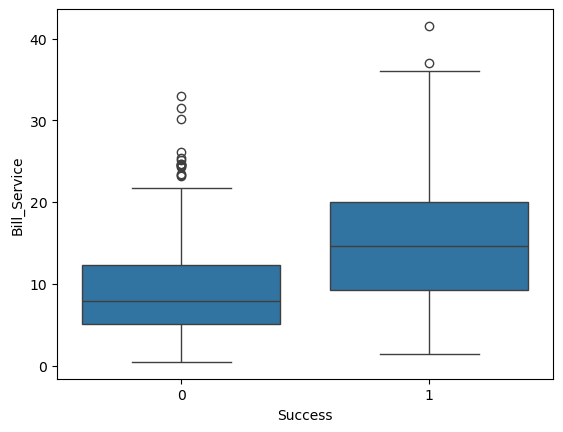

In [8]:
# Visualize bill amounts by “Success”

sns.boxplot(data=campaign_df,x='Success', y='Bill_Service')

<Axes: xlabel='Success', ylabel='Bill_Product'>

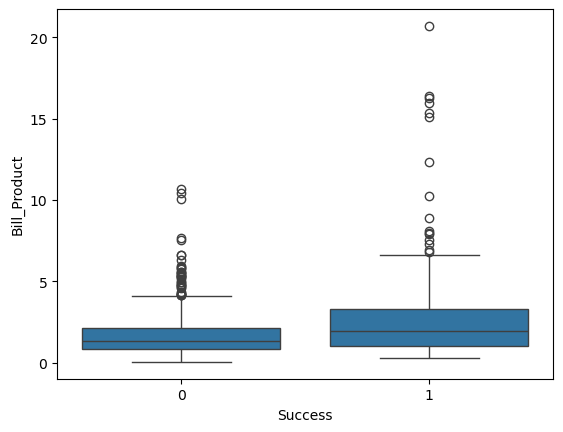

In [9]:
sns.boxplot(data=campaign_df,x='Success', y='Bill_Product')


In [10]:
# Analyze association between Gender and Success

# Create a cross-table
cross_table=pd.crosstab(campaign_df['Gender'], campaign_df['Success'])



In [11]:
# Perform chi-squared test
chi2, p,_ ,_ = chi2_contingency(cross_table)

In [12]:
# Display the cross-table and chi-squared test results
print("Cross-Table:")
print(cross_table)
print("\nChi-Squared Test:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")

Cross-Table:
Success    0   1
Gender          
1        225  86
2        278  94

Chi-Squared Test:
Chi2: 0.3807592682933615
P-value: 0.5371971687062078


Since the p value is greater than 0.05, Gender and Success are not related

In [13]:
# Develop a statistical model to estimate probability of success

import statsmodels.formula.api as sm

model = sm.logit(formula = 'Success~Gender+AGE+Recency_Service+Recency_Product+Bill_Service+Bill_Product',data=campaign_df).fit() 

# Display the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.399695
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  683
Model:                          Logit   Df Residuals:                      675
Method:                           MLE   Df Model:                            7
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.3070
Time:                        09:33:34   Log-Likelihood:                -272.99
converged:                       True   LL-Null:                       -393.91
Covariance Type:            nonrobust   LLR p-value:                 1.516e-48
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0215      0.279     -3.655      0.000      -1.569      -0.474
Gender[T.2]   

In [14]:
# 5) Finalize the model by excluding insignificant variables

model = sm.logit(formula = 'Success~Recency_Service+Recency_Product+Bill_Service+Bill_Product',data=campaign_df).fit() 

# Display the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.403273
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                  683
Model:                          Logit   Df Residuals:                      678
Method:                           MLE   Df Model:                            4
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.3008
Time:                        09:43:58   Log-Likelihood:                -275.44
converged:                       True   LL-Null:                       -393.91
Covariance Type:            nonrobust   LLR p-value:                 4.224e-50
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1578      0.248     -4.673      0.000      -1.643      -0.672
Recency_Servic

In [15]:
# 6) Estimate predicted probabilities and add a column in the original data

campaign_df['predprob'] = model.predict()
campaign_df.head()


,SN,Gender,AGE,Recency_Service,Recency_Product,Bill_Service,Bill_Product,Success,predprob
0,1,1,<=45,12,11,11.82,2.68,0,0.095042
1,2,2,<=30,6,0,10.31,1.32,0,0.287900
2,3,1,<=30,1,9,7.43,0.49,0,0.246703
3,4,1,<=45,2,14,13.68,1.85,0,0.392590
4,5,2,<=30,0,11,4.56,1.01,1,0.263444


In [16]:
# 7) Use 0.5 as a threshold, estimate Success=0/1

campaign_df['estimated_success'] = np.where(campaign_df['predprob'] > 0.5, 1, 0)
campaign_df['estimated_success']=campaign_df['estimated_success'].astype('category')
print(campaign_df)

      SN Gender   AGE  Recency_Service  Recency_Product  Bill_Service  \
0      1      1  <=45               12               11         11.82   
1      2      2  <=30                6                0         10.31   
2      3      1  <=30                1                9          7.43   
3      4      1  <=45                2               14         13.68   
4      5      2  <=30                0               11          4.56   
..   ...    ...   ...              ...              ...           ...   
678  679      1  <=55               18               28         14.79   
679  680      1  <=55               24                5          5.05   
680  681      1  <=55               18                5         14.22   
681  682      1  <=30                3                3         29.64   
682  683      2  <=30                5                9          8.85   

     Bill_Product  Success  predprob estimated_success  
0            2.68        0  0.095042                 0  
1        

In [ ]:
# 8) Analyze model accuracy and misclassification rate
# confuse matrix
pd.crosstab(campaign_df['estimated_success'], campaign_df['Success'])

Success,0,1
estimated_success,,
0,467,88
1,36,92


In [ ]:


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(campaign_df['Success'], campaign_df['estimated_success'])

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix    
cm = confusion_matrix(campaign_df['Success'], campaign_df['estimated_success'])
print("Confusion Matrix:", cm)


Confusion Matrix: [[467  36]
 [ 88  92]]


In [23]:
from sklearn.metrics import classification_report
report = classification_report(campaign_df['Success'], campaign_df['estimated_success'])
print("Classification Report:", report)

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88       503
           1       0.72      0.51      0.60       180

    accuracy                           0.82       683
   macro avg       0.78      0.72      0.74       683
weighted avg       0.81      0.82      0.81       683

